# - CASE STUDY : Bank Customer Churm Prediction 
- 참고 코드 : https://www.kaggle.com/code/yldzburhan/ps4e01-bank-churn-prediction-lgbm-xgb

In [3]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


In [4]:
train_df = pd.read_csv('C:/Users/jeonghwanlee/Downloads/train.csv')
test_df = pd.read_csv('C:/Users/jeonghwanlee/Downloads/test.csv')
origin_df = pd.read_csv('C:/Users/jeonghwanlee/Downloads/Churn_Modelling.csv')

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [7]:
origin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [8]:
train_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [9]:
origin_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [10]:
# 컬럼의 고유값
train_df = pd.concat([train_df.drop(['id','Surname'], axis=1), origin_df.drop(['RowNumber', 'Surname'], axis=1)], ignore_index=True)
test_df.drop(['id','Surname'], axis=1, inplace=True)

In [11]:
train_df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


### 👀 Features:

- id: Unique identifier for each record. 인덱스 
- CustomerId: Unique customer identifier. 고객 id
- Surname: Customer's last name. 고객의 성
- CreditScore: Customer's credit score. 신용 점수
- Geography: Geographical region where the customer resides. 거주 지역
- Gender: Customer's gender. 성별
- Age: Customer's age. 나이
- Tenure: Number of years the customer has been associated with the bank. 가입년수
- Balance: Customer's account balance. 계좌 잔액
- NumOfProducts: Number of products the customer has. 가입 상품 수
- HasCrCard: Whether the customer has a credit card (1: Yes, 0: No). 신용카드 여부
- IsActiveMember: Whether the customer is an active member (1: Yes, 0: No). 활성화된 회원 여부
- EstimatedSalary: Estimated salary of the customer. 예상 급여
- Exited: Target variable indicating whether the customer has exited (1: Yes, 0: No). 이탈여부

- ## 데이터 전처리

In [12]:
train_df.isnull().sum()

CustomerId         0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

<Axes: >

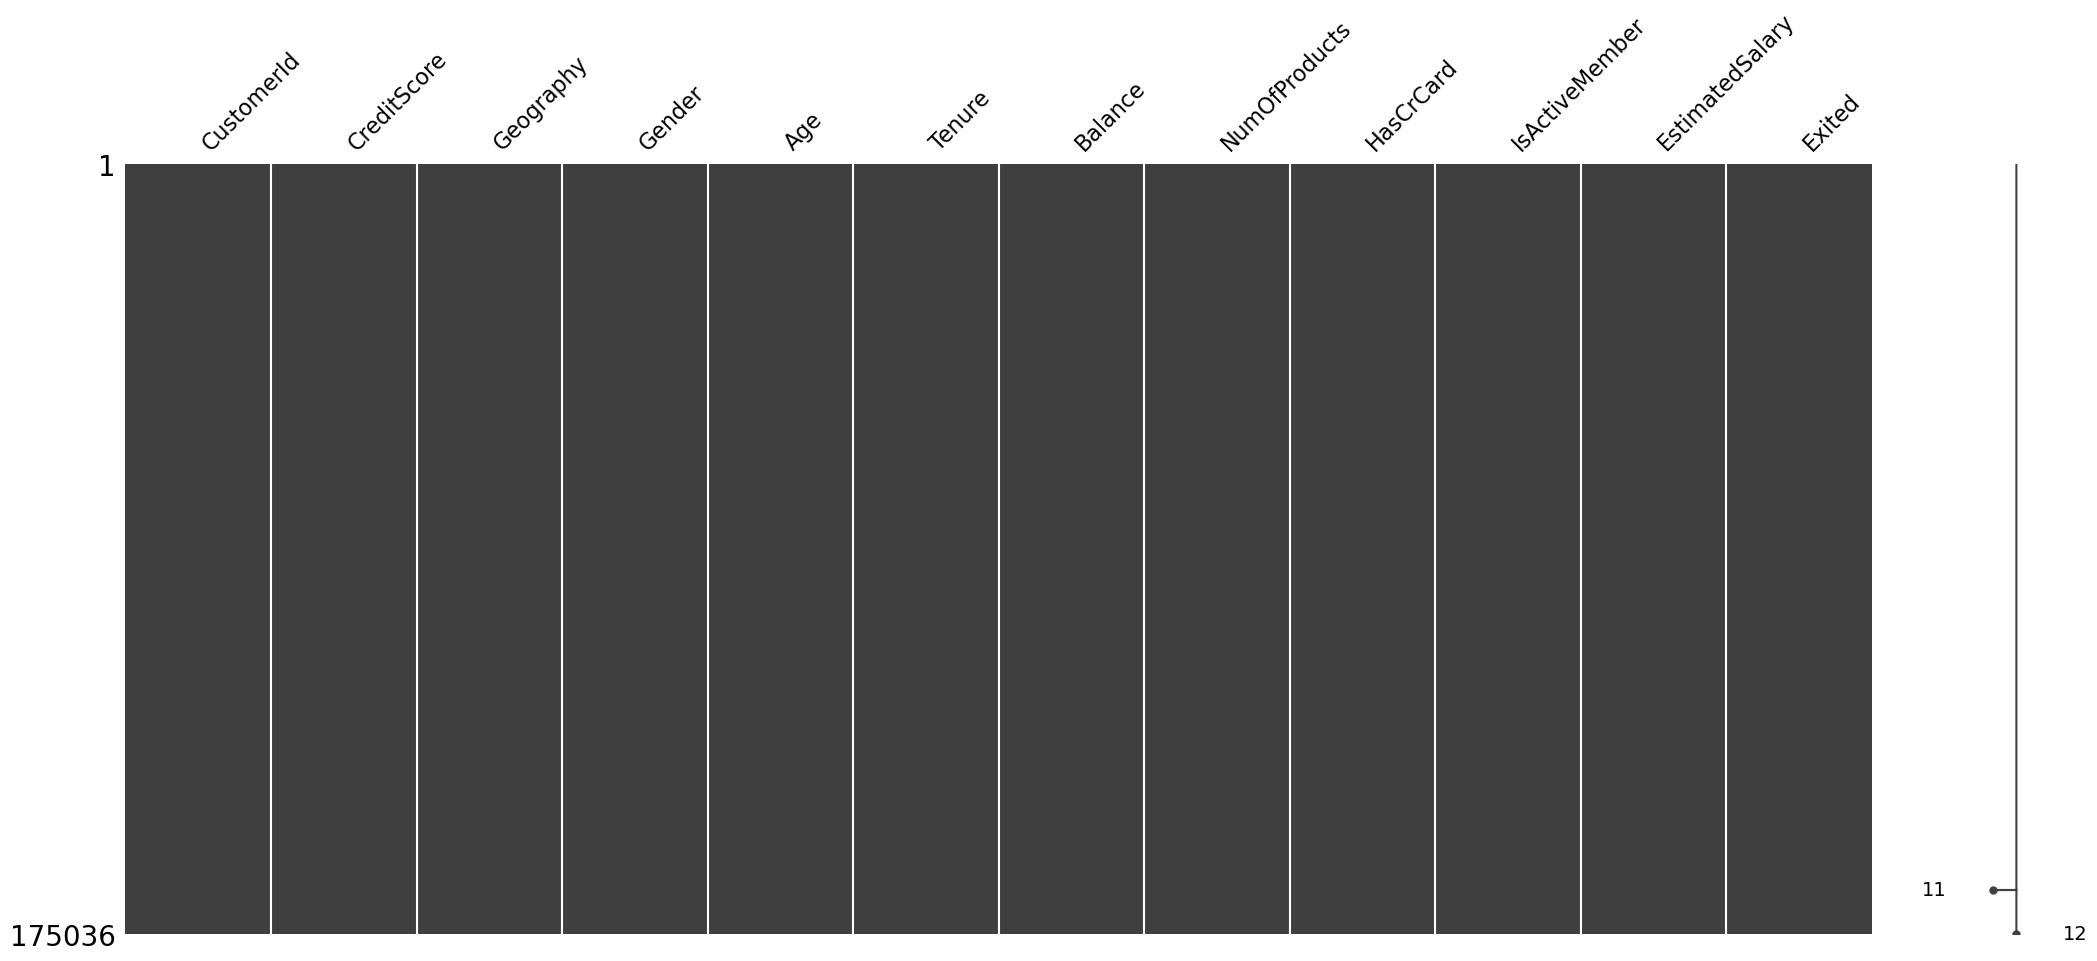

In [13]:
import missingno as msno
msno.matrix(train_df)

In [14]:
train_df.duplicated().sum()

199

In [15]:
# 중복행 삭제
train_df.drop_duplicates(inplace = True)

In [16]:
train_df.nunique()

CustomerId         23421
CreditScore          460
Geography              3
Gender                 2
Age                   73
Tenure                11
Balance            30239
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary    55581
Exited                 2
dtype: int64

## 타켓 컬럼 비율 확인

In [17]:
# 시각화 위한 일시적 처리
train_df["Exited"]=train_df["Exited"].map({0: "No",1: "Yes"})

In [18]:
def plot_target(df: pd.DataFrame, col: str, title: str, pie_colors:list) -> None:
    fig, ax = plt.subplots(1,2,figsize=(15, 6), width_ratios=[2,1])

    textprops={'fontsize': 12, 'weight': 'bold',"color": "black"}
    ax[0].pie(df[col].value_counts().to_list(),
            colors=pie_colors,
            labels=df[col].value_counts().index.to_list(),
            autopct='%1.f%%', 
            explode=([.05]*df[col].nunique()),
            pctdistance=0.5,
            wedgeprops={'linewidth' : 1, 'edgecolor' : 'black'}, 
            textprops=textprops)

    sns.countplot(x = col, data=df, palette = "pastel6", order=df[col].value_counts().to_dict().keys())
    for p, count in enumerate(df[col].value_counts()):
        ax[1].text(p-0.11, count+np.sqrt(count)+1000, count, color='black', fontsize=13)
    plt.setp(ax[1].get_xticklabels(), fontweight="bold")
    plt.yticks([])
    plt.box(False)
    fig.suptitle(x=0.56, t=f'► {title} Distribution ◄', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()

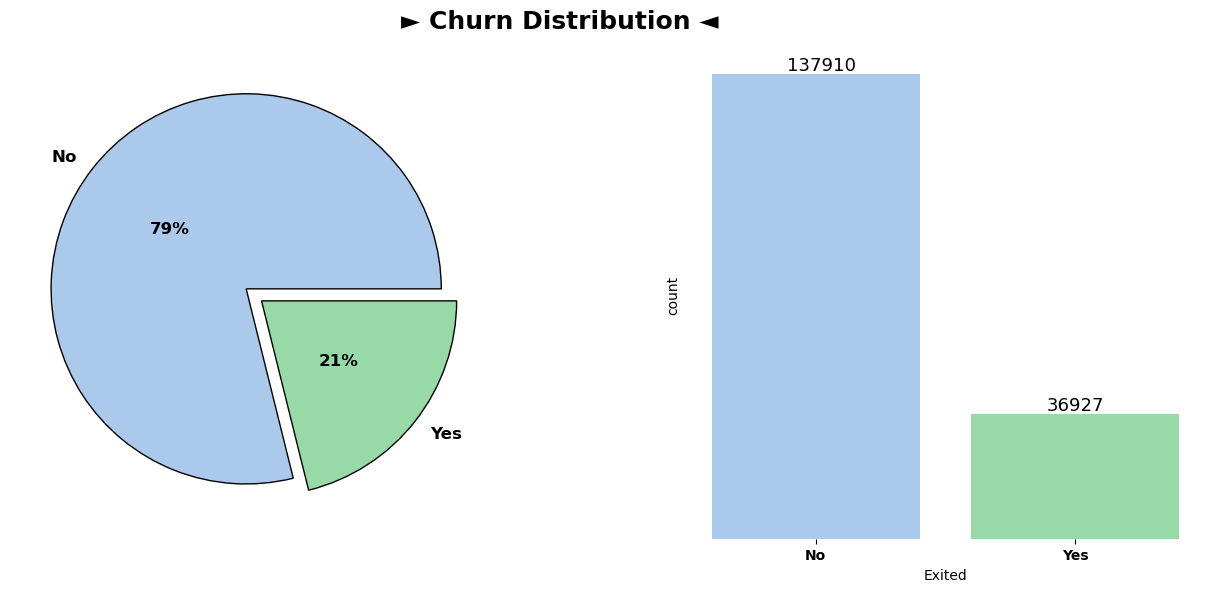

In [19]:
plot_target(train_df, 
            col="Exited", 
            title="Churn", 
            pie_colors=["#abc9ea","#98daa7","#f3aba8","#d3c3f7","#f3f3af","#c0ebe9"])

In [20]:
train_df['Exited'].value_counts()

Exited
No     137910
Yes     36927
Name: count, dtype: int64

###  -> 타겟이 되는 Exited의 값이 8:2로 불균형하여 후에 불균형을 해소할 샘플링 작업 등이 필요할 것으로 보임

In [21]:
# 숫자형 데이터  
num_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [22]:
# 범주형 데이터
target = "Exited"
cat_cols = ['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember']

## 각각의 컬럼 내 값 비율 단순 분석

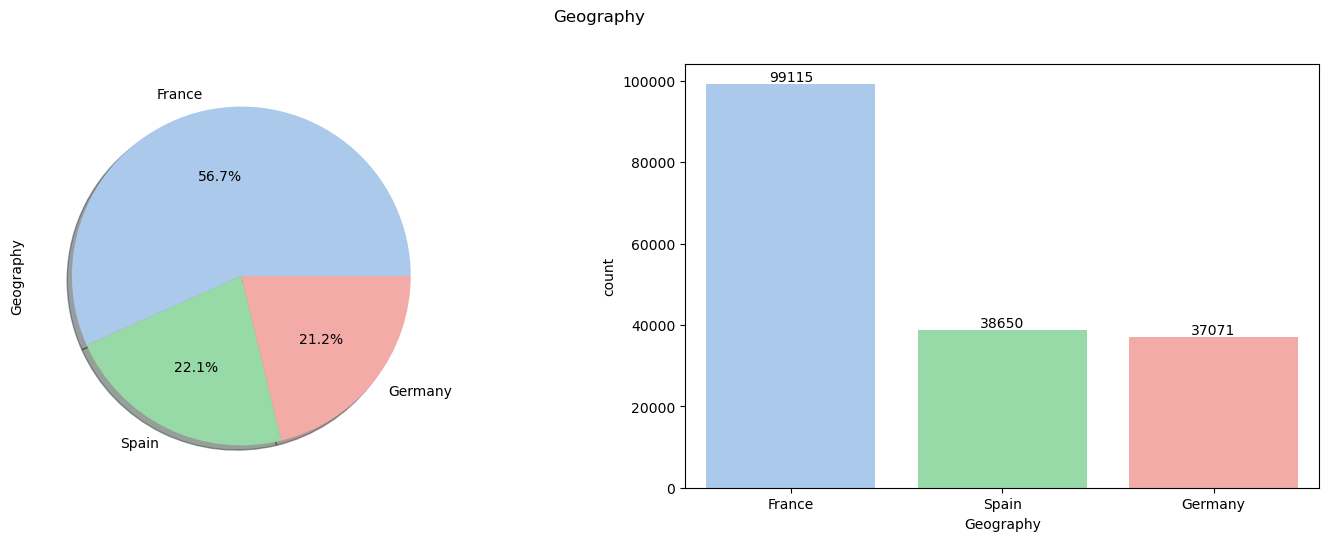

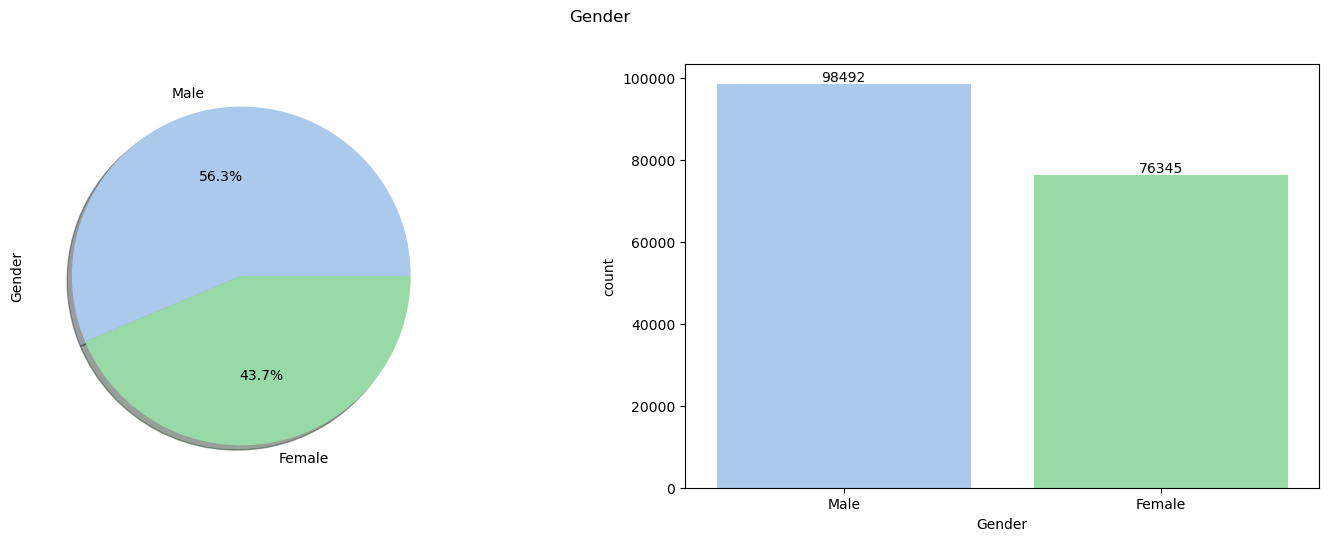

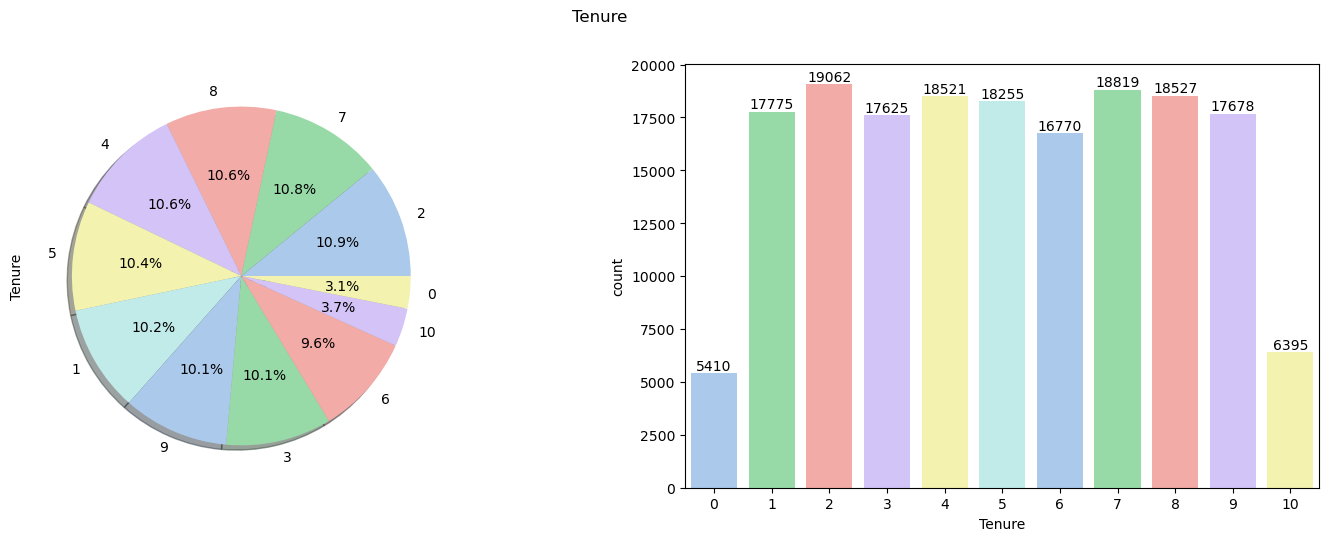

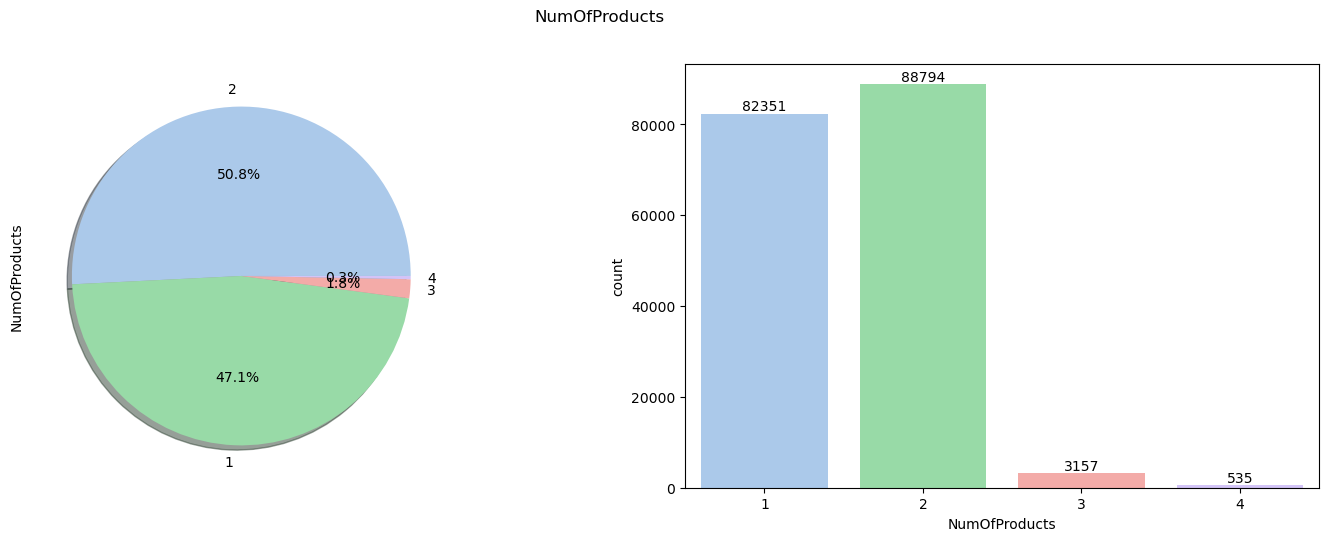

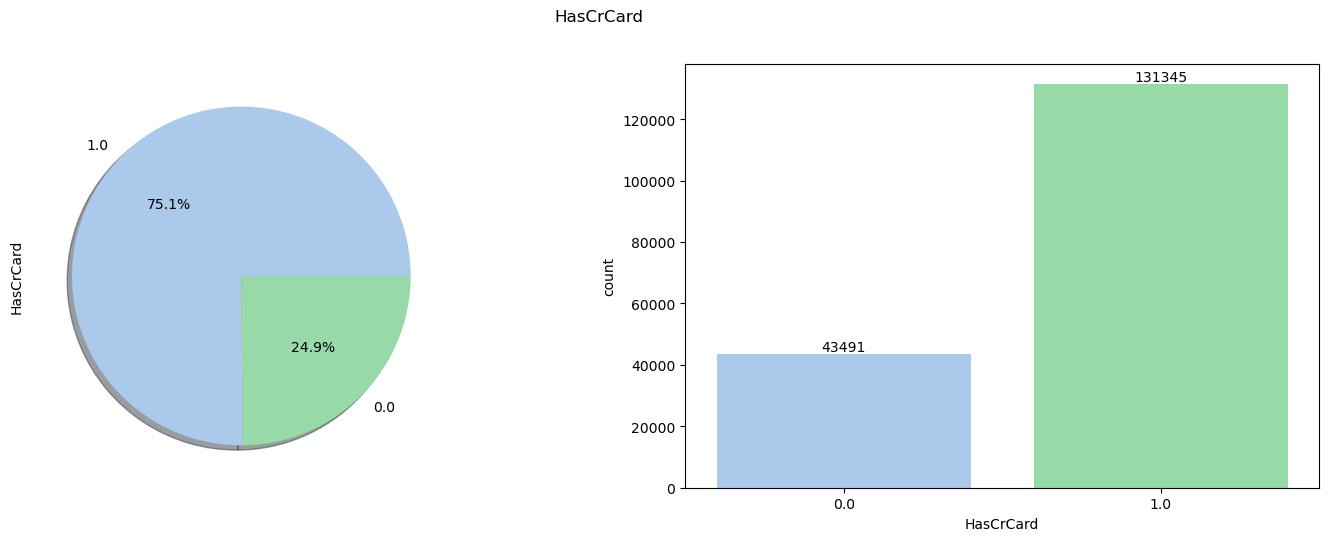

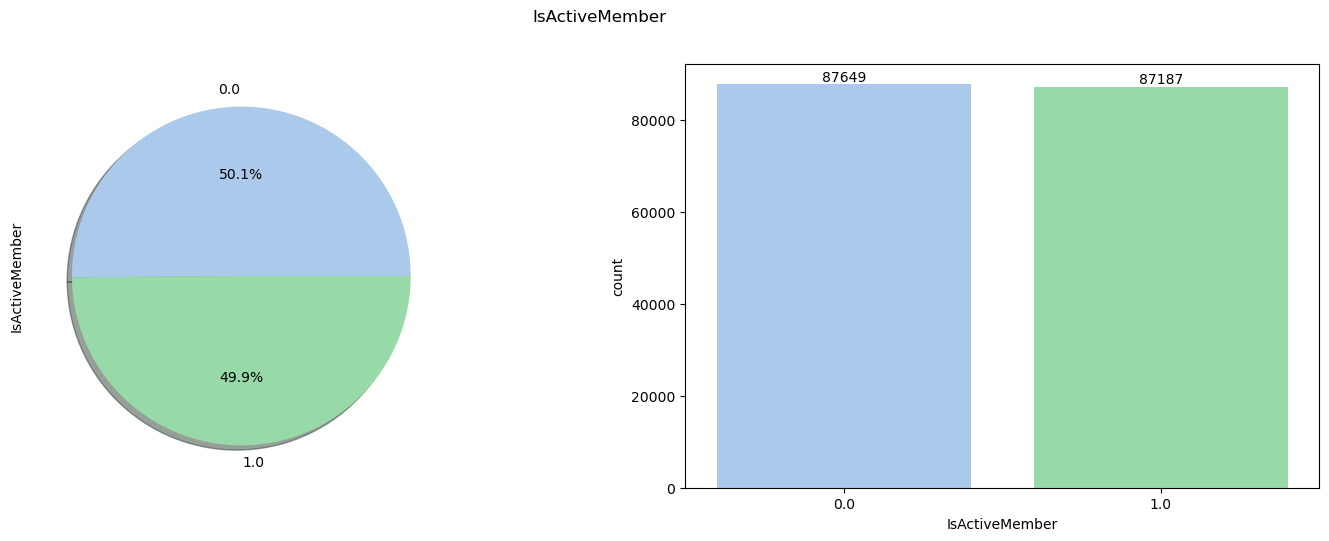

In [23]:
for column in cat_cols:
    f,ax=plt.subplots(1,2,figsize=(18,5.5))
    # cmap = plt.cm.get_cmap('twilight_shifted')
    train_df[column].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, colors =["#abc9ea","#98daa7","#f3aba8","#d3c3f7","#f3f3af","#c0ebe9"])
    ax[0].set_ylabel(f'{column}')
    # pie_data = train_df[column].value_counts()
    # ax[0].pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', shadow=True, colors=plt.cm.Pastel1.colors)
    # ax[0].set_ylabel(f'{column}')
    sns.countplot(x=column,data=train_df,ax=ax[1],palette='pastel6')
    ax[1].bar_label(ax[1].containers[0])
    plt.suptitle(f'{column}')
    plt.show()

In [24]:
def create_mosaic_plot(df, col1, col2):
    col1_values = df[col1].unique()
    col2_values = df[col2].unique()

    color_palette = plt.cm.get_cmap('Pastel1', len(col1_values))
    colors = {str(val): color_palette(i) for i, val in enumerate(col1_values)}
    
    alphas = np.linspace(0.3, 0.7, len(col2_values))
    alpha_dict = {str(val): alpha for val, alpha in zip(col2_values, alphas)}
    
    def props(key):
        color = colors.get(str(key[0]), (0, 0, 0))
        alpha = alpha_dict.get(str(key[1]), 1)
        return {'color': color[:3] + (alpha,)}

    def labels(key):
        lab1 = {str(val): str(val) for val in col1_values}
        lab2 = {str(val): str(val) for val in col2_values} if col2 != 'Exited' else {'1': 'exited', '0': 'not exited'}

        label = f'{lab1.get(key[0], "unknown")} & {lab2.get(key[1], "unknown")}'
        return label

    fig, ax = plt.subplots(figsize=(16, 8))
    mosaic(df, [col1, col2], properties=props, labelizer=labels, ax=ax)
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.grid(False)
    plt.show()

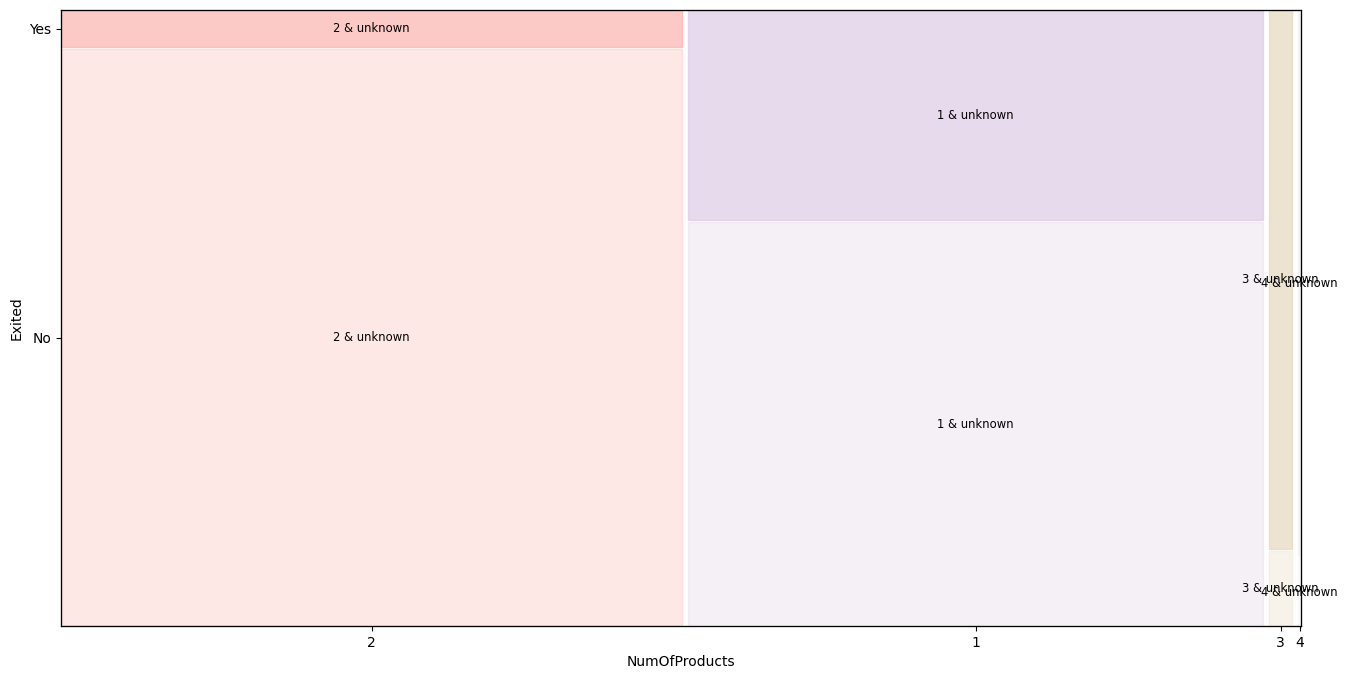

In [25]:
create_mosaic_plot(train_df, 'NumOfProducts','Exited')

- 성비는 5.5 : 4.5 수준으로 남자의 비율이 조금 더 많다는 것을 알 수 있다.
- 시는 지역은 약 56%가 프랑스, 나머지 남은 비율의 절반씩 약 22%의 스페인, 독일로 이루어져 있다.
- 가입 기간(년수) : 1년 미만과 10년 이상을 제외한 나머지는 비교적 동일한 비율을 가진다.
- 가입 상품 수 : 98% 이상이 1개와 2개를 가지고 있고 3개와 4개를 가진 비율은 희박하다.
- 신용카드 여부 : 75%가 가지고 있고 25%는 가지고 있지 않다.
- 활성회원 여부 : 활성회원과 비활성회원이 거의 50%씩 구성되어 있다. 

## 범주형 데이터 이탈별 분석

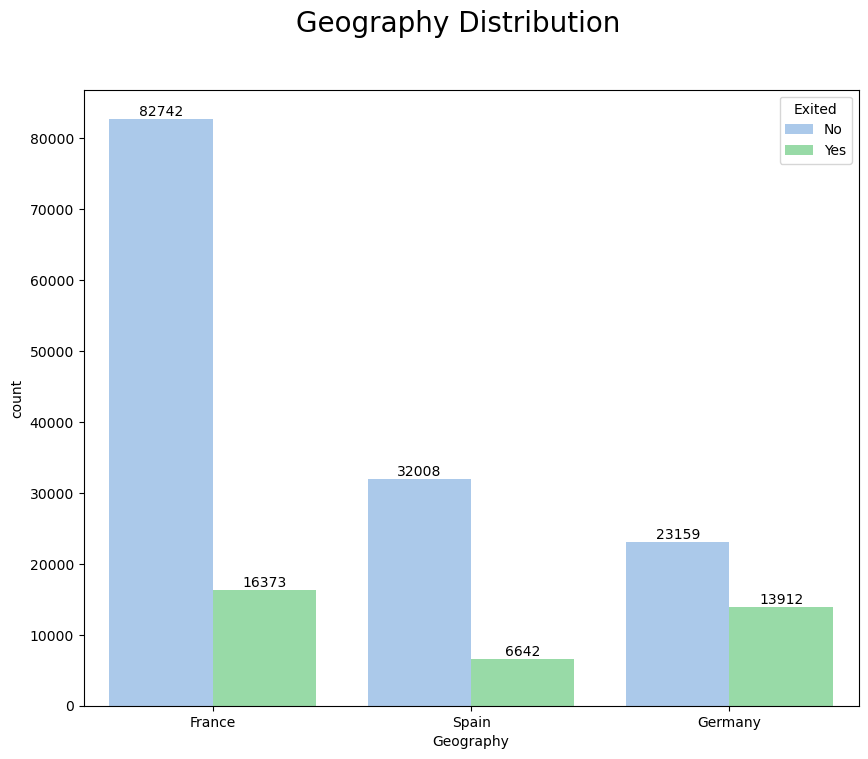

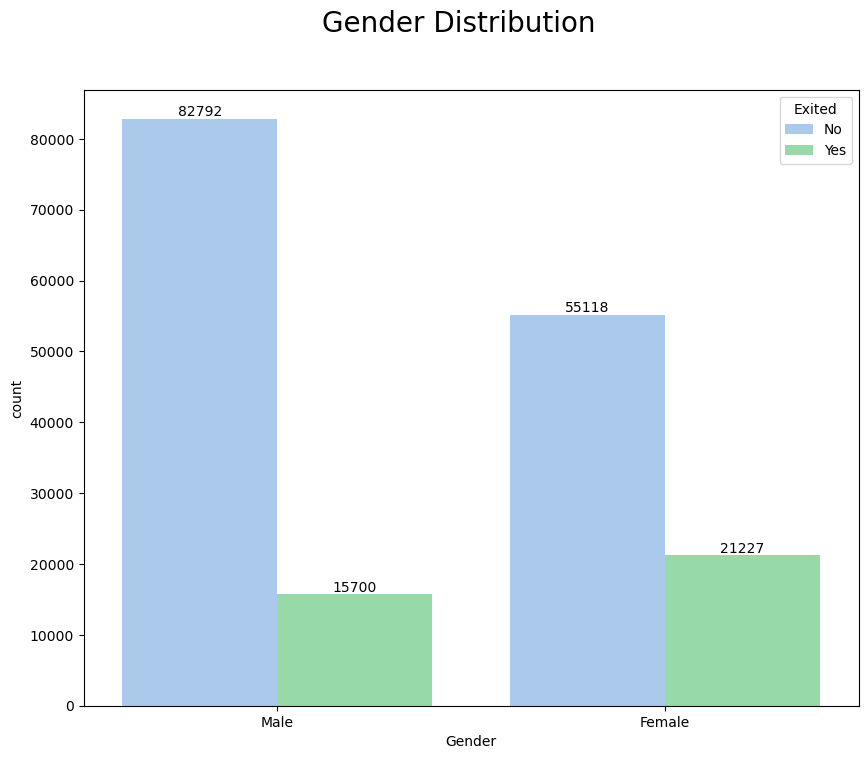

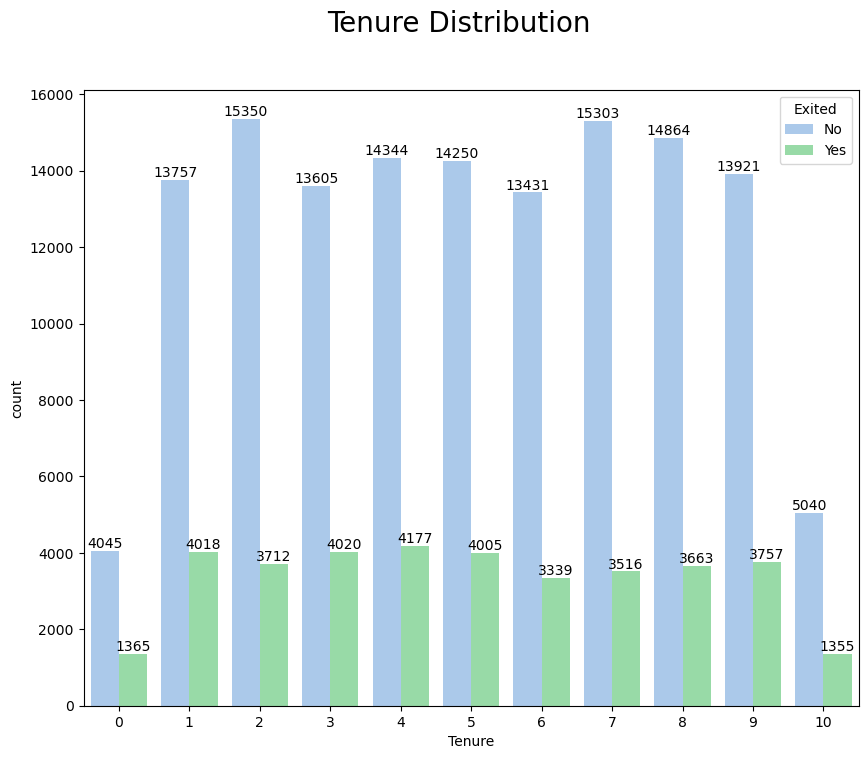

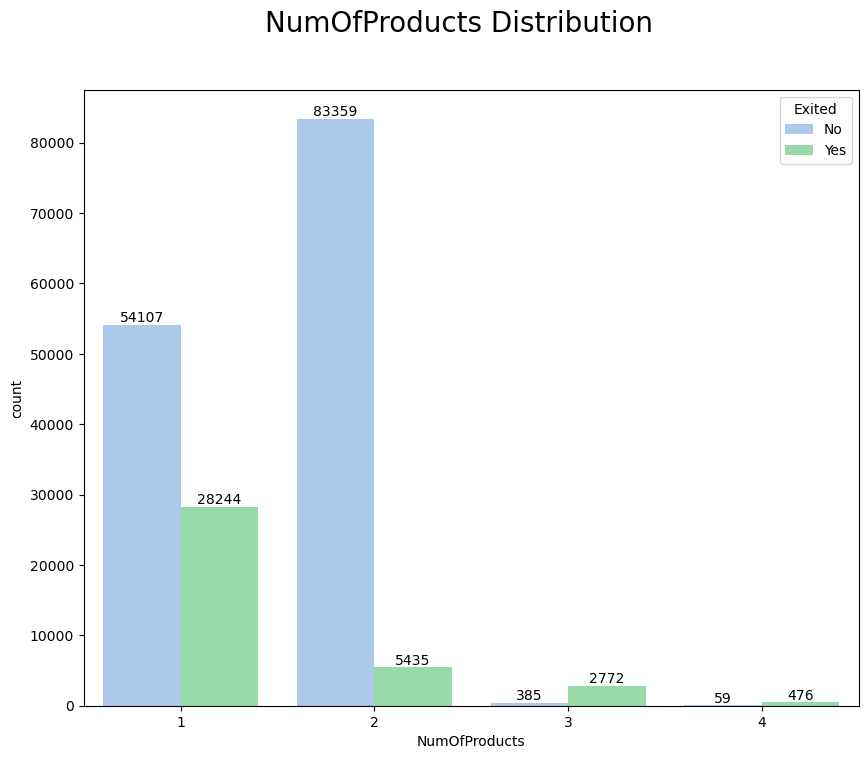

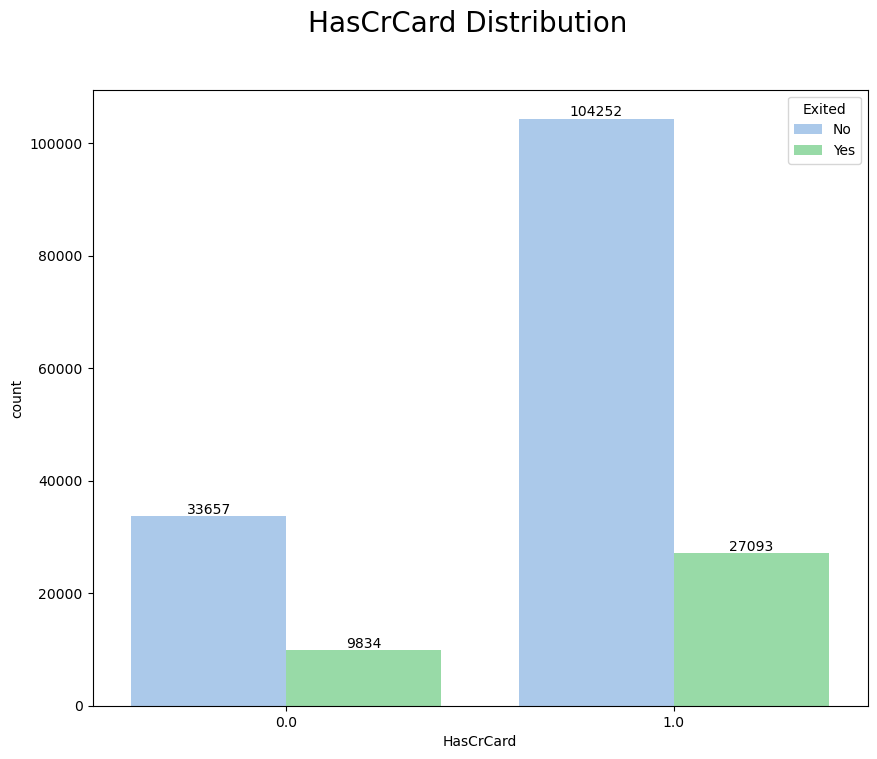

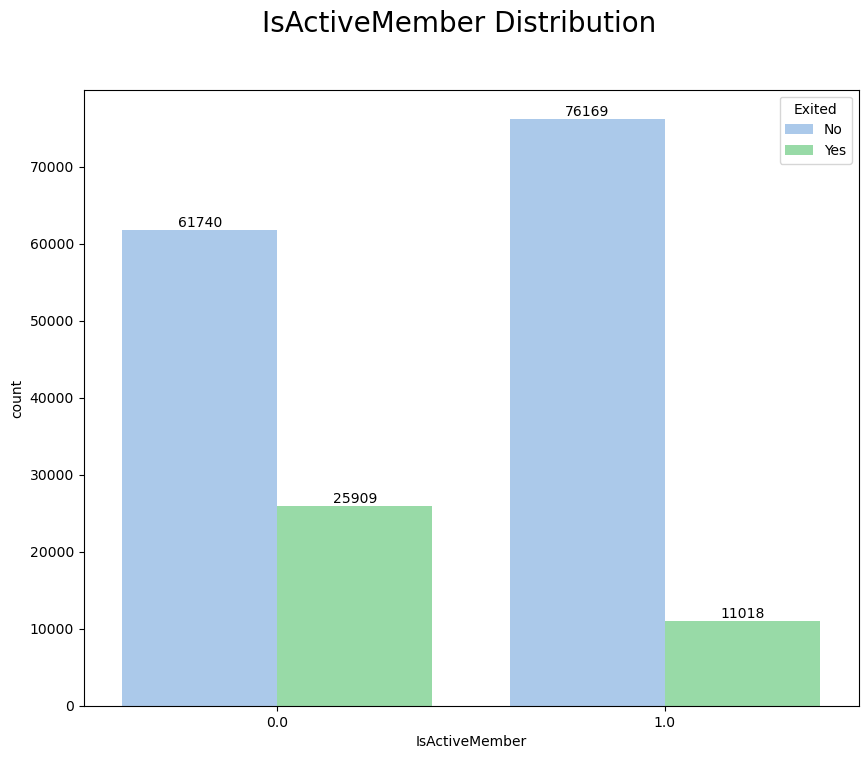

In [26]:
for column in cat_cols:
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.countplot(hue="Exited", x=column, data=train_df, palette="pastel6",)
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.suptitle(f'{column} Distribution',fontsize=20)
    plt.show()


- 거주 국가별 가장 많은 이탈수는 가장 고객이 많은 프랑스이지만 비율로 봤을 때는 독일의 이탈률이 가장 크다.
- 성별 이탈 수에서는 여성의 이탈 비율이 높은 것으로 보인다.
- 가입기간에 따른 이탈비율과 신용카드 유뮤에 따른 이탈비율의 특징은 크게 보이지 않는 것 같다.
- 가입 상품이 1개인 사람들의 반이 이탈하고 2개인 사람들은 이탈률은 현저히 적어지는 것만을 볼 때는 가입 상품이 많을 수록 이탈률이 적어지는 것 같지만 정작 3개 이상을 가입한 사람들부터는 이탈하지 않는 사람들보다 이탈하는 사람들이 많다.
- 활성 멤버 여부는 비활성 고객들의 이탈률이 높다.

### 연속형 변수 이탈별 분석

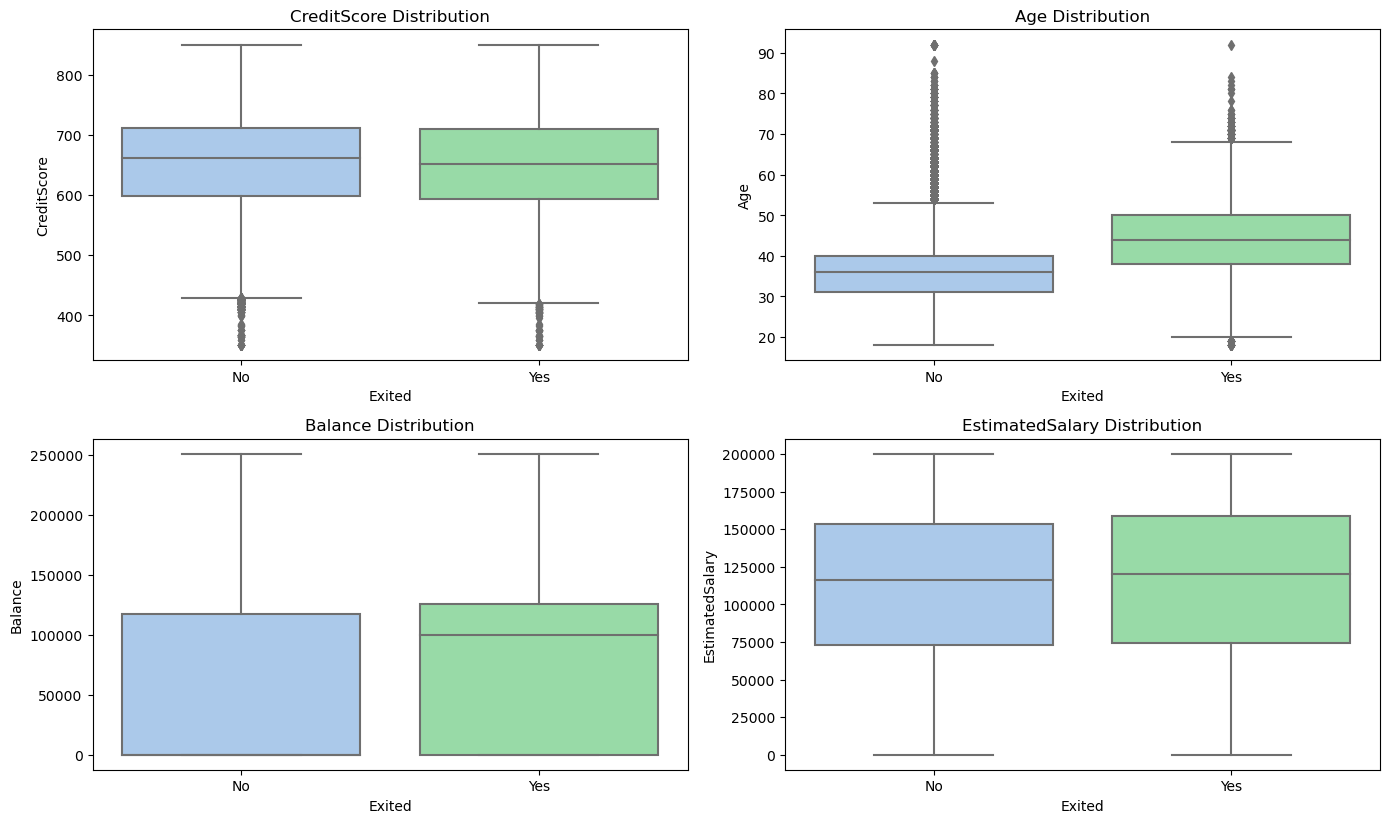

In [27]:
plt.figure(figsize=(14,len(num_cols)*3))
for idx,column in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,2,idx+1)
    sns.boxplot(x="Exited", y=column, data=train_df, palette="pastel6")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

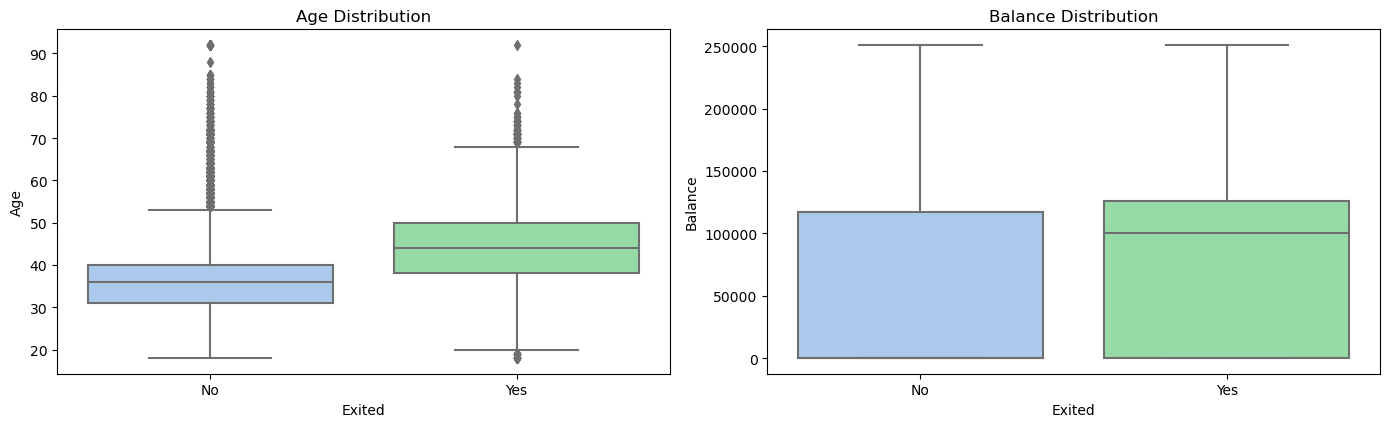

In [28]:
plt.figure(figsize=(14,len(num_cols)*3))
for idx,column in enumerate(['Age','Balance']):
    plt.subplot(len(num_cols)//2+1,2,idx+1)
    sns.boxplot(x="Exited", y=column, data=train_df, palette="pastel6")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

<Figure size 1400x1000 with 0 Axes>

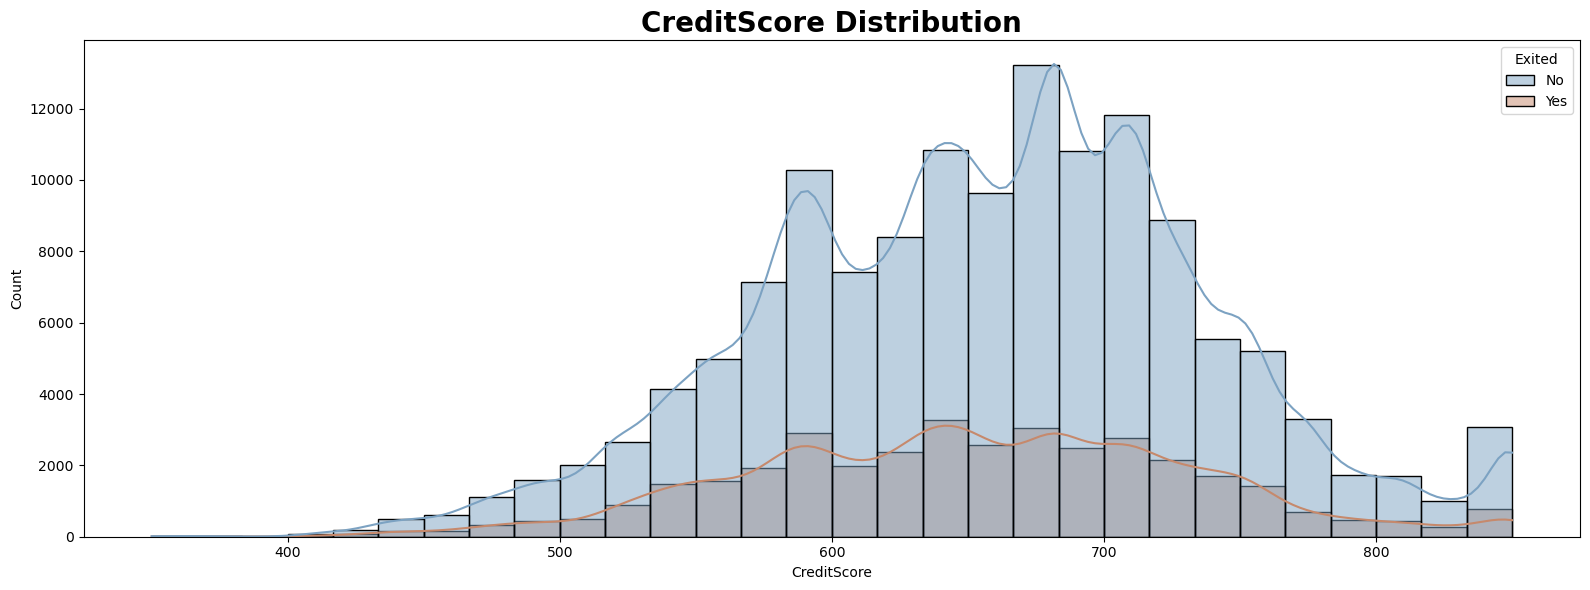

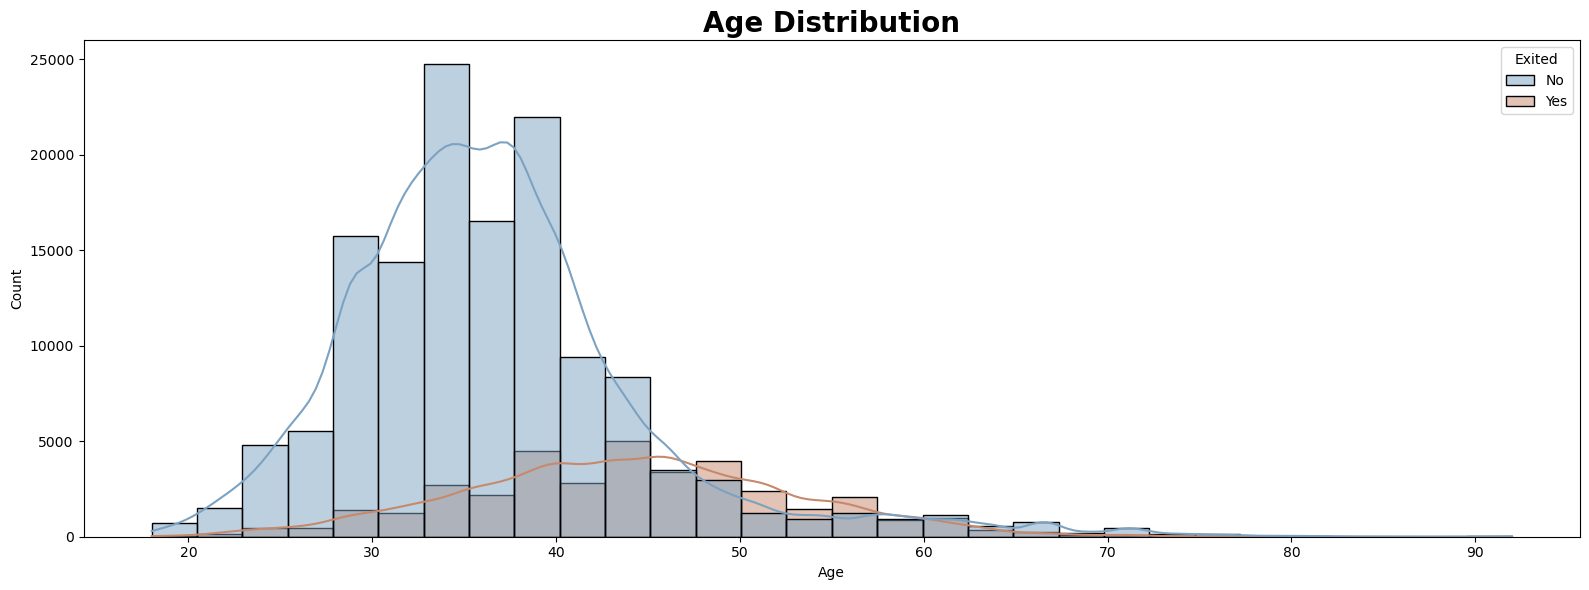

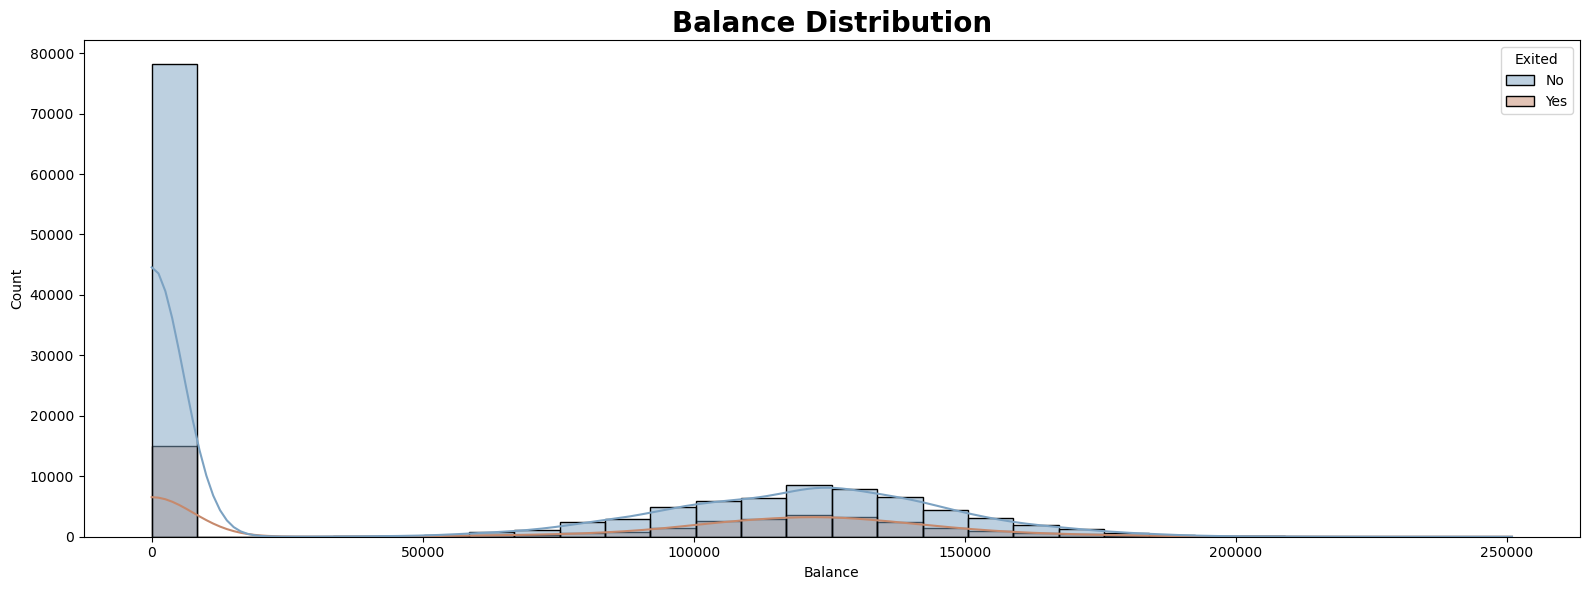

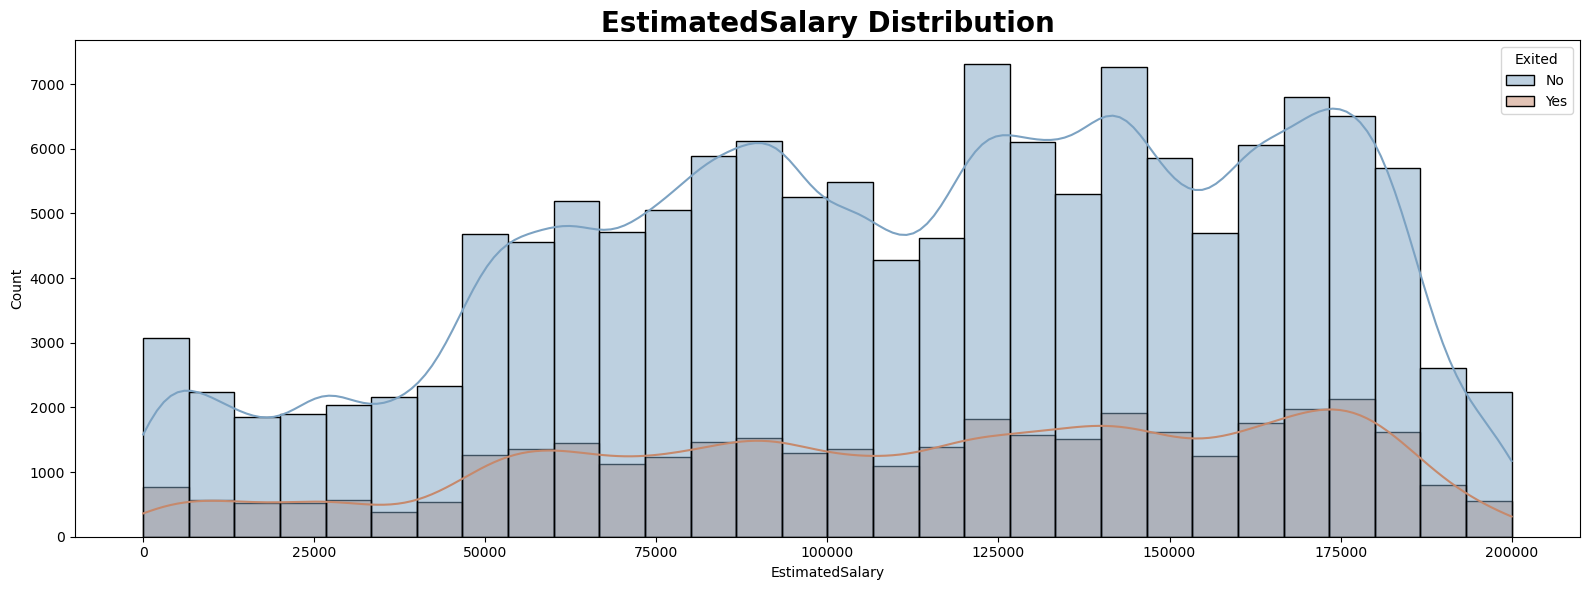

In [29]:
plt.figure(figsize=(14,10))
for idx,column in enumerate(num_cols):
    fig, ax = plt.subplots(figsize=(16, 6))
    fig = sns.histplot(x=column, hue="Exited", data=train_df,bins=30,kde=True, palette="twilight_shifted")
    plt.title(f"{column} Distribution",weight='bold',fontsize=20)
    plt.tight_layout()

- 600 - 700 사이의 신용점수를 가진 고객들이 가장 많이 분포하고 있고 신용점수에 따른 이탈률의 특징은 잘 보이지 않는다.
- 나이는 30-40 대의 나이대의 사람들이 가장 많이 분포하고 있고, 40대 후반에서부터 이탈률이 커지는 것을 알 수 있다.
- 잔고는 많은 고객들이 매우 적은 돈을 가지고 있고, 100000 - 150000 대의 잔고를 가지고 있는 사람들의 이탈률이 큰 것으로 보인다
- 예상 급여는 75000 - 150000 사람들이 가장 많이 분포하고 있고, 예상 급여 또한 이탈률의 특징은 잘 보이지 않는다.

In [30]:
train_df["Exited"]=train_df["Exited"].map({"No": 0,"Yes": 1})
train_df["Gender"]=train_df["Gender"].map({"Male": 0,"Female": 1})

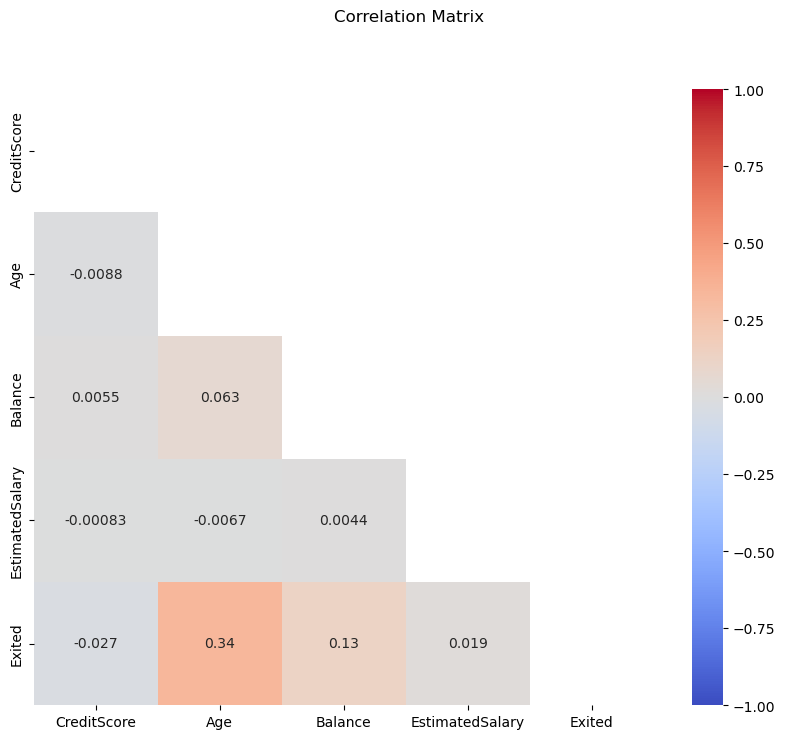

In [34]:
# 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 

df4 = train_df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']].copy()

corr_matrix=df4.corr()

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

f,ax=plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.suptitle('Correlation Matrix')
plt.show()

- 나이, 가입상품수, 활성멤버여부가 이탈률과 상관관계가 있어보인다

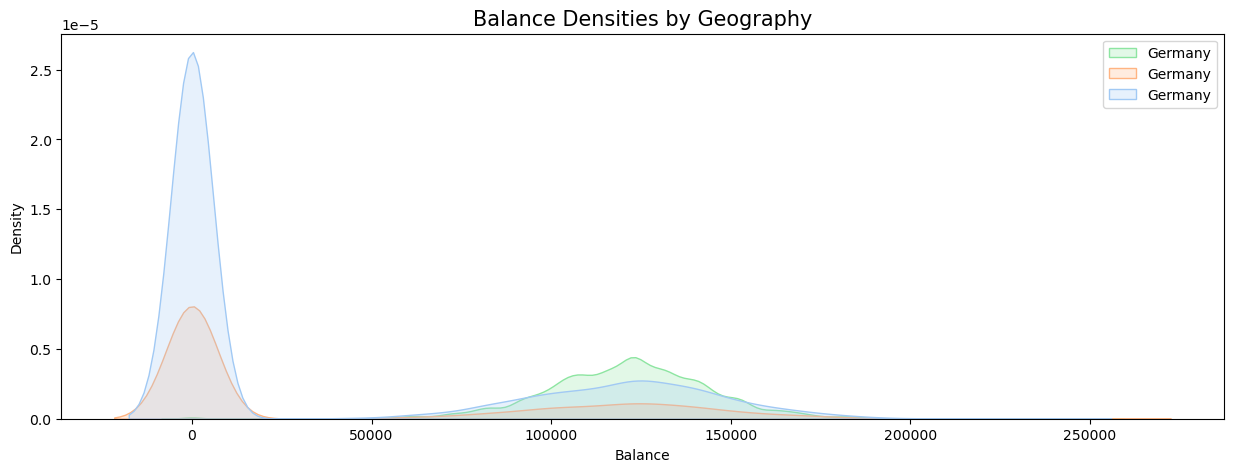

In [33]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
sns.kdeplot(data=train_df, x='Balance', hue='Geography', fill=True, ax=axs, label="Germany", color='r', palette='pastel')
axs.set_title("Balance Densities by Geography", fontsize=15)
axs.set_ylabel("Density")
axs.set_xlabel("Balance")
axs.legend()
plt.show()


In [35]:
train_df["Gender"]=train_df["Gender"].map({0 :"Male",1 : "Female"})

In [36]:
train_df = train_df.drop(['CustomerId'], axis = 1)
train_df_encoded = pd.get_dummies(train_df, columns=['Geography',
                                       'Gender',
                                       'IsActiveMember',
                                       'HasCrCard',
                                       'NumOfProducts'])
train_df_encoded.head(3)

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,IsActiveMember_0.0,IsActiveMember_1.0,HasCrCard_0.0,HasCrCard_1.0,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,668,33.0,3,0.0,181449.97,0,True,False,False,False,True,True,False,False,True,False,True,False,False
1,627,33.0,1,0.0,49503.50,0,True,False,False,False,True,False,True,False,True,False,True,False,False
2,678,40.0,10,0.0,184866.69,0,True,False,False,False,True,True,False,False,True,False,True,False,False


In [37]:
test_df = test_df.drop(['CustomerId'], axis=1)
test_df_encoded = pd.get_dummies(test_df, columns=['Geography',
                                       'Gender',
                                       'IsActiveMember',
                                       'HasCrCard',
                                       'NumOfProducts'])
test_df_encoded.head(3)

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,IsActiveMember_0.0,IsActiveMember_1.0,HasCrCard_0.0,HasCrCard_1.0,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,586,23.0,2,0.0,160976.75,True,False,False,True,False,False,True,True,False,False,True,False,False
1,683,46.0,2,0.0,72549.27,True,False,False,True,False,True,False,False,True,True,False,False,False
2,656,34.0,7,0.0,138882.09,True,False,False,True,False,True,False,False,True,False,True,False,False


In [39]:
train_df_encoded.dropna(inplace=True)

X = train_df_encoded.drop('Exited', axis = 1)
y = train_df_encoded['Exited']

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, random_state = 13)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((139868, 18), (34968, 18), (139868,), (34968,))

## Modeling

### 1. Decision Tree GridSearch

#### 샘플링 전

In [40]:
params = {'max_depth': [2, 4, 7, 10, 15]}

dt = DecisionTreeClassifier(max_depth=2, random_state=13)

dt_gs = GridSearchCV(estimator=dt, param_grid=params, cv = 5)
dt_gs.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=13),
             param_grid={'max_depth': [2, 4, 7, 10, 15]})

In [43]:
dt_gs.best_score_, dt_gs.best_params_

(0.8600323222238393, {'max_depth': 7})

In [44]:
dt_gs = dt_gs.best_estimator_
dt_pred = dt_gs.predict(X_test)
print(accuracy_score(y_test, dt_pred))
print(roc_auc_score(y_test, dt_pred))

0.8591283459162663
0.7588308147622334


#### 샘플링 후

In [48]:
smote = SMOTE(random_state=13)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

X_train_over.shape, y_train_over.shape, y_train_over.value_counts()

((220658, 18),
 (220658,),
 Exited
 0    110329
 1    110329
 Name: count, dtype: int64)

In [50]:
dt_gs = GridSearchCV(estimator=dt, param_grid=params, cv = 5)
dt_gs.fit(X_train_over, y_train_over)
dt_gs.best_score_, dt_gs.best_params_

(0.8828373273886332, {'max_depth': 10})

In [51]:
dt_gs = dt_gs.best_estimator_
dt_pred = dt_gs.predict(X_test)
print(accuracy_score(y_test, dt_pred))
print(roc_auc_score(y_test, dt_pred))

0.8553248684511553
0.7710859249638694


### 2. Logsitic Regression GridSearch

#### 샘플링 전

 Logistic Regression 하이퍼 파라미터 종류
- C: 규제 강도를 나타내는 매개변수입니다. 값이 작을수록 규제가 강해지고, 모델이 단순해집니다. 기본값은 1.0입니다.
- penalty: 규제 유형을 지정하는 매개변수입니다. 'l1' 또는 'l2'를 선택할 수 있으며, 기본값은 'l2'입니다. 'l1'은 L1 규제를 나타내며, 'l2'는 L2 규제를 나타냅니다.
- solver: 최적화에 사용할 알고리즘을 지정하는 매개변수입니다. 다양한 최적화 알고리즘이 있으며, 예를 들어, 'saga', 'liblinear', 'newton-cg' 등이 있습니다.
- max_iter: 최적화 알고리즘의 최대 반복 횟수를 나타내는 매개변수입니다. 기본값은 100입니다.

In [53]:
params = {'C': [0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2'],
              'solver': ['saga', 'liblinear', 'newton-cg'], 
    'max_iter': [100, 500, 1000]}

lr = LogisticRegression(random_state=13)
lr_gs = GridSearchCV(estimator=lr, param_grid=params, cv = 5, n_jobs = -1)
lr_gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=13),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 500, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['saga', 'liblinear', 'newton-cg']})

In [55]:
lr_gs.best_score_, lr_gs.best_params_

(0.8551777255228478,
 {'C': 100, 'max_iter': 500, 'penalty': 'l2', 'solver': 'newton-cg'})

In [56]:
lr_gs_result = lr_gs.best_estimator_
lr_pred = lr_gs_result.predict(X_test)
print(accuracy_score(y_test,lr_pred))
print(roc_auc_score(y_test,lr_pred))

0.8550674902768245
0.728162635997539


#### 샘플링 후

In [58]:
lr_gs = GridSearchCV(estimator=lr, param_grid=params, cv = 5, n_jobs = -1)
lr_gs.fit(X_train_over,y_train_over)
lr_gs.best_score_, lr_gs.best_params_

(0.883834412969241,
 {'C': 100, 'max_iter': 500, 'penalty': 'l2', 'solver': 'newton-cg'})

In [59]:
lr_sampling_gs_result = lr_gs.best_estimator_
lr_pred = lr_sampling_gs_result.predict(X_test)
print(accuracy_score(y_test,lr_pred))
print(roc_auc_score(y_test,lr_pred))

0.8522935255090368
0.7436964495273484


### 3. Random Forest GridSearch

#### 샘플링 전

In [61]:
params = {
	'n_estimators':[50, 100, 200],
	'max_depth':[6, 8, 10, 12],
	'min_samples_leaf':[8, 12, 18],
	'min_samples_split':[8, 12, 18]
}

rf = RandomForestClassifier(random_state = 13, n_jobs = -1)
rf_gs = GridSearchCV(estimator = rf, param_grid = params, n_jobs = -1)
rf_gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 12, 18],
                         'n_estimators': [50, 100, 200]})

In [62]:
rf_gs.best_score_, rf_gs.best_params_

(0.8644793547166998,
 {'max_depth': 12,
  'min_samples_leaf': 8,
  'min_samples_split': 18,
  'n_estimators': 200})

In [63]:
rf_gs_result = rf_gs.best_estimator_
rf_pred = rf_gs_result.predict(X_test)
print(accuracy_score(y_test,rf_pred))
print(roc_auc_score(y_test,rf_pred))

0.8626744452070464
0.7413090745905105


#### 샘플링 후

In [64]:
rf_sampling_gs = GridSearchCV(estimator = rf, param_grid = params, n_jobs = -1)
rf_sampling_gs.fit(X_train_over, y_train_over)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 12, 18],
                         'n_estimators': [50, 100, 200]})

In [65]:
rf_sampling_gs.best_score_, rf_sampling_gs.best_params_

(0.8935280536549592,
 {'max_depth': 12,
  'min_samples_leaf': 8,
  'min_samples_split': 8,
  'n_estimators': 100})

In [66]:
rf_sampling_gs_result = rf_sampling_gs.best_estimator_
rf_pred = rf_sampling_gs_result.predict(X_test)
print(accuracy_score(y_test,rf_pred))
print(roc_auc_score(y_test,rf_pred))

0.8589281628917868
0.765888405359533


### 4. LightGBM GridSearch

#### 샘플링 전

In [72]:
from lightgbm import early_stopping
params = {
    'boosting_type': ['gbdt'],
    'aplication' : ['binary'],
    'n_estimators': [1000, 2000],
    'max_depth' : [8, 10, 12],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [30, 50, 100],
    'subsample': [0.8, 0.9, 1.0],
}

lgbm = LGBMClassifier(random_state = 13, n_jobs = -1, n_estimators=1000, verbose = -1)

lgbm_gs = GridSearchCV(estimator = lgbm, param_grid = params)
early_stopping_rounds = 10
eval_set =  [(X_test, y_test)]
lgbm_gs_result = lgbm_gs.fit(X_train, y_train, eval_set = [(X_test, y_test)], callbacks=[early_stopping(10, verbose=-1)])

Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[994]	valid_0's binary_logloss: 0.321027
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[913]	valid_0's binary_logloss: 0.321026
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_logloss: 0.321093
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[868]	valid_0's binary_logloss: 0.321233
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[953]	valid_0's binary_logloss: 0.321051
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[994]	valid_0's binary_logloss: 0.321027
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[913]	valid_0's binary_logloss: 0.321026
T

In [ ]:
lgbm_gs_result.best_score_, lgbm_gs_result.best_params_

In [76]:
lgbm_gs_result = lgbm_gs_result.best_estimator_
lgbm_pred = lgbm_gs_result.predict(X_test)
lgbm_pred_proba = lgbm_gs_result.predict_proba(X_test)[:,1]
print(accuracy_score(y_test,lgbm_pred))
print(roc_auc_score(y_test,lgbm_pred_proba))

0.8641329215282544
0.8886704371944706


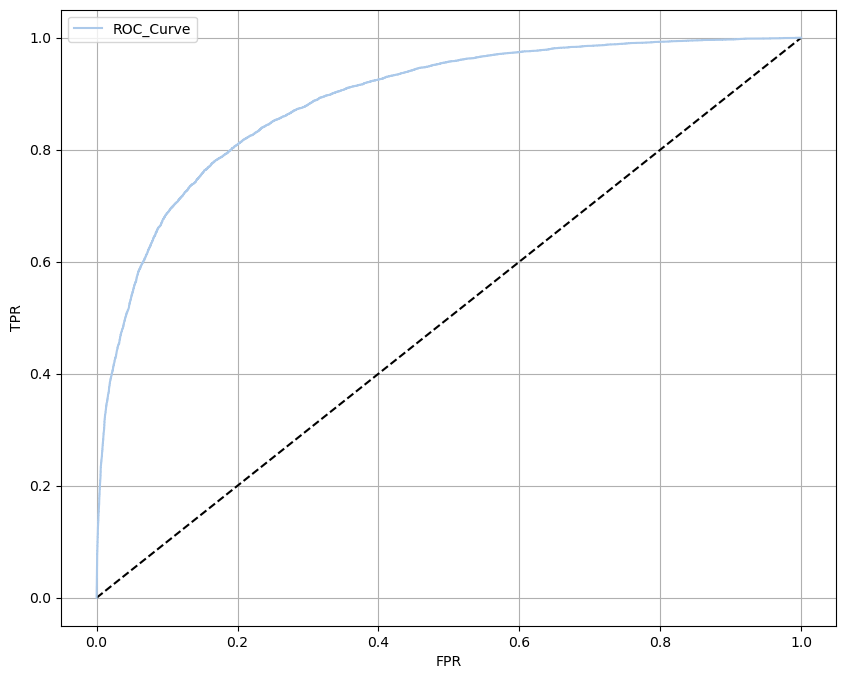

In [79]:
fpr, tpr, threshold = roc_curve(y_test, lgbm_pred_proba)


plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], color='k', ls='dashed')
plt.plot(fpr, tpr, label='ROC_Curve', color='#abc9ea')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.legend()
plt.show()

#### 샘플링 후

In [77]:
lgbm_gs_result = lgbm_gs.fit(X_train_over, y_train_over, eval_set = [(X_test, y_test)], callbacks=[early_stopping(10, verbose=-1)])

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[351]	valid_0's binary_logloss: 0.334902
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_logloss: 0.32289
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_logloss: 0.328098
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_logloss: 0.328273
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_logloss: 0.328085
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[351]	valid_0's binary_logloss: 0.334902
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0

In [80]:
lgbm_gs_result.best_score_, lgbm_gs_result.best_params_

(0.9006204981743142,
 {'aplication': 'binary',
  'boosting_type': 'gbdt',
  'learning_rate': 0.05,
  'max_depth': 8,
  'n_estimators': 1000,
  'num_leaves': 30,
  'subsample': 0.8})

In [81]:
lgbm_sampling_gs_result = lgbm_gs_result.best_estimator_
lgbm_pred = lgbm_sampling_gs_result.predict(X_test)
lgbm_pred_proba = lgbm_sampling_gs_result.predict_proba(X_test)[:,1]
print(accuracy_score(y_test,lgbm_pred))
print(roc_auc_score(y_test,lgbm_pred_proba))

0.8628746282315259
0.8879652066950581


샘플링 전 성능 수치(roc_auc_score)	/	샘플링 후 성능 수치(roc_auc_score)
- dt : 0.7588308147622334		/	 dt : 0.7710859249638694
- lr :  0.728162635997539		/	 lr : 0.7436964495273484
- rf :  0.7413090745905105	   /     rf : 0.765888405359533
- lgbm : 0.8886704371944706	   /   lgbm : 0.8879652066950581